<a href="https://colab.research.google.com/github/CuadraAlconero/IDAL_IA3_CuadraAlconero/blob/main/Preprocess_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



---



# Normalización

Se conoce como normalización a los procesos que utilizando conceptos estadísticos permiten representar un conjunto de características en una misma escala. Existen diversos tipos de normalización:

- Min-Max Scaling: Proceso en el cual se utilizan los valores máximos y mínimos de la variable para representarla en una escala entre 0 y 1. Generalmente tiene sentido aplicar esta técnica cuando los datos no siguen una distribución determinada.

- Standarization: Proceso en el cual se utiliza la media y la desviación estandar de la variable para centrar los valores en una escala entre -1 y 1.  Generalmente tiene sentido aplicar esta técnica cuando los datos siguen una distribución Gaussiana (normal).

Veamos como se aplica esta técnica utilizando sklearn.



---









In [4]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [5]:
dataset = sns.load_dataset("iris")

In [6]:
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
# Standarization
X = dataset.iloc[:,:-1]
std_scl = StandardScaler()
X_transformed = std_scl.fit_transform(X)
X_transformed_df = pd.DataFrame(X_transformed)
X_transformed_df.head(5)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [8]:
# Min-Max Scaling
min_max_scl = MinMaxScaler()
X_transformed = min_max_scl.fit_transform(X)
X_transformed_df = pd.DataFrame(X_transformed)
X_transformed_df.head(5)

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667




---



# Ejercicio

Aplicad ambos tipos de normalización sobre el dataset de pinguins


---








---



# Detección de outliers

Un outlier (o punto singular) es un punto en un dataset que difiere drásticamente del resto. 

Existen diversas formas de detectar la existencia de un punto singular en un conjunto de datos, desde algoritmos de machine learning dedicados a su detección como reglas estadísticas que permiten calcularlos.

El interés en la detección de un outlier radica en el daño al rendimiento de un modelo de machine learning que estos pueden provocar, así como el interés en detectar su propia existencia que puede ser el objetivo del problema (detección de fraude o hábitos de consumo).

Para calcular outliers en este seminario vamos a aplicar la regla intercuartil



# Quartile

Los cuartiles son un punto de corte que en estadística se utilizan para dividir un conjunto de datos en cuatro partes.

Q1 - El primer cuartil se define como el número que divide justo por la mitad a un conjunto de datos entre su valor mínimo y su mediana. Por debajo de este cuartil se encuentra el 25% de los datos y por encima el 75%.

Q2 - El segundo cuartil se define como la mediana. A cada lado de la mediana se encuentra el 50% de los datos.

Q3 - El tercer cuartil se define como el número que divide justo por la mitad a un conjunto de datos entre su valor máximo y su mediana. Por debajo de este cuartil se encuentra el 75% de los datos y por encima el 25%

Distancia intercuartil (IQR) - Se define como Q3 - Q1

Los cuartiles se usan en estadística de forma amplia para describir los conjuntos de datos

# Regla Intercuartil (IQR Rule)

La regla intercuartil define a un outlier como todo punto que cumpla una de estas dos condiciones:

$datapoint > Q3+1.5*IQR$

$datapoint < Q1-1.5*IQR$



---




In [42]:
# Calculamos iqr para todas las variables

dataset = sns.load_dataset("iris").iloc[:, :-1]
describe_df = dataset.describe()
iqr = describe_df.loc["75%"] - describe_df.loc["25%"]
iqr

sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64

In [43]:
# Calculamos el límite superior e inferior
upper_bound = describe_df.loc["75%"]+1.5*iqr
lower_bound = describe_df.loc["25%"]-1.5*iqr

In [44]:
upper_bound

sepal_length     8.35
sepal_width      4.05
petal_length    10.35
petal_width      4.05
dtype: float64

In [57]:
# Encontramos los outliers
bool_index = dataset > upper_bound
outliers = bool_index.sum(axis=1)
bool_index2 = outliers > 0
dataset.loc[bool_index2]

,sepal_length,sepal_width,petal_length,petal_width
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2


In [59]:
# Encontramos que variable produce el outlier
bool_index.loc[bool_index2]

,sepal_length,sepal_width,petal_length,petal_width
15,False,True,False,False
32,False,True,False,False
33,False,True,False,False


In [60]:
# Encontramos los outliers
bool_index = dataset < lower_bound
outliers = bool_index.sum(axis=1)
bool_index2 = outliers > 0
dataset.loc[bool_index2]

,sepal_length,sepal_width,petal_length,petal_width
60,5.0,2.0,3.5,1.0


In [61]:
# Encontramos que variable produce el outlier
bool_index.loc[bool_index2]

,sepal_length,sepal_width,petal_length,petal_width
60,False,True,False,False




---



# Ejercicio

Calculad si existe algún outlier en el dataset penguins usando la regla intercuartil.



---



In [141]:
# Tú código aquí



---


# Isolation Forest

Los isolation forest son un algoritmo basadod en árboles de decisión que se utilizan para encontrar outliers. Están basados en árboles de decisión y en esencia se construyen de forma similar a un algoritmo de bagging (aunque existen discrepancias importantes). 

Intuitivamente este algoritmo se basa en el concepto de split para encontrar los outliers. Si os fijáis en la imagen, es posible interpretar que es necesario realizar menos splits para aislar un outlier que un punto "normal" en nuestros datos.

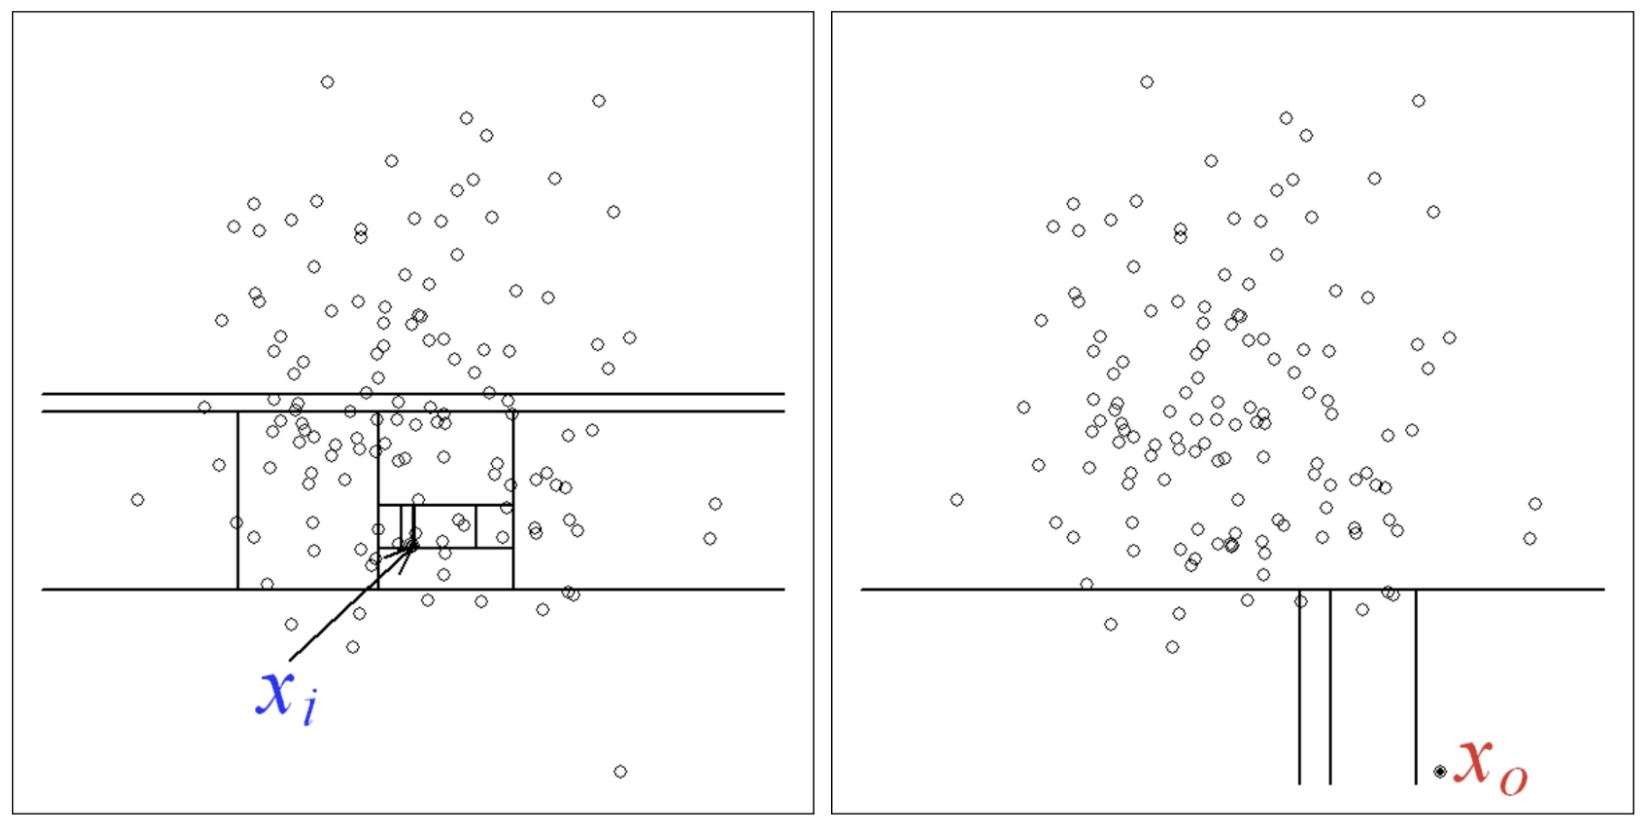

La idea del algoritmo es realizar cuantos splits sea necesario para aislar todos los puntos. El algoritmo contabiliza este número de splits y aquellos que haya aislado con un menor número de splits serán considerados candidatos a ser outlier.



---



---



In [133]:
from sklearn.ensemble import IsolationForest

In [136]:
# Construímos el modelo con la clase de sklearn
dataset = sns.load_dataset("iris").iloc[:,:-1]
iso_forest = IsolationForest(n_estimators=500)
iso_forest.fit(dataset)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=500,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [137]:
# Con el método predict obtenemos con un 1 que muestra ha sido elegida como outlier
# y con un -1 cuales son normales
iso_forest.predict(dataset)

array([ 1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,
        1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1])

In [139]:
# Con el método score_samples obtenemos una puntuación para ccada una de las muestras
# Más negativo significa que la muestra ha sido elegida como normal
iso_forest.score_samples(dataset)

array([-0.40853931, -0.42976229, -0.4401997 , -0.45285888, -0.41836908,
       -0.50917674, -0.47711618, -0.40319272, -0.51689733, -0.4849371 ,
       -0.44488918, -0.42753168, -0.48635356, -0.60896787, -0.57992676,
       -0.6104762 , -0.52268029, -0.42868898, -0.53019754, -0.45316415,
       -0.46548716, -0.4597282 , -0.55592813, -0.50719125, -0.50194893,
       -0.44745465, -0.45196829, -0.4146531 , -0.41518832, -0.44140419,
       -0.43648586, -0.4692314 , -0.55751429, -0.54350173, -0.42362194,
       -0.46290446, -0.47418853, -0.4861464 , -0.49085707, -0.40604889,
       -0.45229023, -0.61123255, -0.48824327, -0.52391937, -0.53016364,
       -0.46465296, -0.45642042, -0.435484  , -0.43924581, -0.41188121,
       -0.49387292, -0.43927323, -0.45475914, -0.47732787, -0.4218858 ,
       -0.40821745, -0.45775654, -0.53206109, -0.43815982, -0.48829099,
       -0.59752749, -0.4297084 , -0.53807382, -0.40535036, -0.45956122,
       -0.450856  , -0.41924993, -0.46860723, -0.50244895, -0.45



---



---



# Ejercicio

Utiliza isolation forest para encontrar posibles outliers en el dataset de penguins



---





In [140]:
# Tú código aquí



---



# Generación Series Temporales Con Pandas

Cuando se trabaja con un índice que depende del tiempo es frecuente necesitar preprocesar los datos y realizar agrupaciones en una determinada frecuencia de tiempo.

Realizar este ejercicio es muy sencillo utilizando pandas y el objeto Grouper. Las claves para introducir las frecuencias para la agrupación se pueden encontrar 



---



In [71]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
!unzip occupancy_data.zip

--2021-11-04 12:23:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 335713 (328K) [application/x-httpd-php]
Saving to: ‘occupancy_data.zip.1’

occupancy_data.zip. 100%[===================>] 327.84K   958KB/s    in 0.3s    

2021-11-04 12:23:38 (958 KB/s) - ‘occupancy_data.zip.1’ saved [335713/335713]

Archive:  occupancy_data.zip
  inflating: datatest.txt            
  inflating: datatest2.txt           
  inflating: datatraining.txt        


In [81]:
dataset = pd.read_csv("./datatraining.txt")
dataset.head(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [87]:
dataset["date"] = dataset["date"].astype("datetime64[ns]")
dataset.set_index("date")

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...
2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1


In [88]:
# Utilizamos pd.Grouper para operar con nuestra serie temporal
grouper = pd.Grouper(key="date", freq="2H")
group_df = dataset.groupby(grouper).mean()
group_df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 16:00:00,23.125556,27.220500,423.277778,705.833333,0.004768,1.000000
2015-02-04 18:00:00,22.343471,27.283829,24.235537,613.719008,0.004557,0.057851
2015-02-04 20:00:00,21.577024,26.330098,0.000000,507.308824,0.004194,0.000000
2015-02-04 22:00:00,21.266861,25.557458,0.000000,471.651389,0.003993,0.000000
2015-02-05 00:00:00,21.179601,25.235923,0.000000,448.860193,0.003921,0.000000
...,...,...,...,...,...,...
2015-02-10 00:00:00,20.304862,32.958085,0.000000,477.277548,0.004859,0.000000
2015-02-10 02:00:00,20.254769,32.890721,0.000000,454.368347,0.004834,0.000000
2015-02-10 04:00:00,20.149583,32.997042,0.000000,446.868056,0.004818,0.000000




---



# Ejercicio 

Realiza una agrupación con el dataset previo cada 2 días y cada mes



---



In [142]:
# Tu código aquí



---



# Selección de Características

Los algoritmos de selección de características permiten hacer una selección previa de las features que se utilizarán en el modelo. Existen diversos métodos y están basados en diferentes conceptos y perspectivas:

- Filter based: Métodos que utilizan una métrica para filtrar las características.

- Wrapper based: Estos métodos convierten el problema de selección de características en un problema de búsqueda.

- Embbeded based: Estos métodos integran el problema de selección de características en el propio algoritmo que se pretende entrenar para la tarea seleccionada.

En este seminario vamos a estudiar los métodos filter based para seleccionar características:

- Correlation Method: En este método se descartan las variables en función de su correlación. Si dos variables están altamente correladas se descarta una de ellas. La intuición tras el método se encuentra en que si dos variables están altamente correladas es posible predecir una a partir de la otra y no aporta información útil.
- Variation Method: En este método se descartan variables en función de un valor indicado por el usuario de la varianza de una variable. La intuición tras el método se encuentra en que las variables con una baja varianza se encuentran muy agrupadas en torno a un valor fijo y por lo tanto aportarían poca información útil.

Y un método wrapper based:

- Recursive Feature Estimation: En este método se realiza una selección de características previas (se elige un subconjunto de las mismas) y se realiza un entrenamiento. Mediante este método es posible probar subconjuntos de características y evaluar el resultado del modelo y seleccionar el subconjunto más optimo (se trata de un bucle for, es computacionalmente costoso).



---



In [126]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.validation import check_is_fitted

In [96]:
dataset = sns.load_dataset("iris").iloc[:,:-1]

In [98]:
# En este ejemplo aplicando el método de la correlación
# Elegimos eliminar o petal_width o petal_length
# También se podría considerar eliminar sepal_length
dataset.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [99]:
dataset.drop(labels=["petal_length"], axis=1)

,sepal_length,sepal_width,petal_width
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2
...,...,...,...
145,6.7,3.0,2.3
146,6.3,2.5,1.9
147,6.5,3.0,2.0
148,6.2,3.4,2.3


In [102]:
# Para aplicar el método de la varianza es necesario primero
# normalizar los datos para evitar que la escala
# En este caso elegimos eliminar la variable petal_length
# Pues su dispersión es mínima con respecto al resto y además
# está correlada
min_max_scl = MinMaxScaler()
X_transformed = min_max_scl.fit_transform(dataset)
X_transformed_df = pd.DataFrame(X_transformed, columns=dataset.columns)
X_transformed_df.var()

sepal_length    0.052908
sepal_width     0.032983
petal_length    0.089522
petal_width     0.100869
dtype: float64

In [128]:
# Para aplicar RFE utilizamos la clase implementada en sklearn
dataset = sns.load_dataset("iris")
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]
estimator = DecisionTreeClassifier(max_depth=5)
rfe_estimator = RFE(estimator=estimator, n_features_to_select=2)

In [129]:
rfe_estimator.fit(X, Y)

RFE(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                     criterion='gini', max_depth=5,
                                     max_features=None, max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     presort='deprecated', random_state=None,
                                     splitter='best'),
    n_features_to_select=2, step=1, verbose=0)

In [130]:
# Con el atributo support podemos ver que características ha seleccionado el algoritmo
rfe_estimator.support_

array([False, False,  True,  True])

In [131]:
# Con el atributo ranking podemos ver que importancia ha dado a cada característica
rfe_estimator.ranking_

array([3, 2, 1, 1])

Tras realizar el ejercicio es necesario entrenar el algoritmo con el nuevo dataset puesto que la clase RFE no devuelve el algoritmo entrenado.



---



---



# Ejercicio

Aplica los métodos de feature selection que creas conveniente al dataset de penguins y tras esto entrena un algoritmo. Compara el resultado con un modelo sin haber usado feature selection.


---

